In [1]:
import pandas as pd

df = pd.read_csv('data/conso_meteo.csv')

# Conversion de la colonne date et ajout d'un datetime complet avec heure si nécessaire
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['heure'], unit='h')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60600 entries, 0 to 60599
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   LOAD      60600 non-null  float64       
 1   w1        60600 non-null  int64         
 2   w2        60600 non-null  int64         
 3   w3        60600 non-null  int64         
 4   w4        60600 non-null  int64         
 5   w5        60600 non-null  int64         
 6   w6        60600 non-null  int64         
 7   w7        60600 non-null  int64         
 8   w8        60600 non-null  int64         
 9   w9        60600 non-null  int64         
 10  w10       60600 non-null  int64         
 11  w11       60600 non-null  int64         
 12  w12       60600 non-null  int64         
 13  w13       60600 non-null  int64         
 14  w14       60600 non-null  int64         
 15  w15       60600 non-null  int64         
 16  w16       60600 non-null  int64         
 17  w17       60

# Visualisation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 7))
plt.plot(df['datetime'], df['LOAD'], label='LOAD', alpha=0.7)
plt.plot(df['datetime'], df['LOAD'].rolling(window=168).mean(), label='Moyenne mobile (168h)', color='red')  # sur une semaine, par exemple
plt.xlabel('Temps')
plt.ylabel('LOAD')
plt.title('Évolution de LOAD dans le temps')
plt.legend()
plt.show()


In [ ]:
# Conversion de la colonne 'date' en datetime et ajout de la colonne 'heure'
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['heure'], unit='h')

# Définir 'datetime' comme index
df.set_index('datetime', inplace=True)

# On s'assure que l'index est trié par date
df = df.sort_index()

# Choisir une date de départ (par exemple, la première date disponible)
start_date = df.index.min()

# Définir les fenêtres temporelles avec DateOffset
one_month = start_date + pd.DateOffset(months=1)
three_months = start_date + pd.DateOffset(months=3)
six_months = start_date + pd.DateOffset(months=6)
one_year = start_date + pd.DateOffset(years=1)

# Filtrer les données pour chaque période
df_1m = df.loc[start_date:one_month]
df_3m = df.loc[start_date:three_months]
df_6m = df.loc[start_date:six_months]
df_1y = df.loc[start_date:one_year]

# Créer une figure avec 4 subplots (2 lignes x 2 colonnes)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()  # pour simplifier l'indexation

# Subplot 1 : 1 mois
axs[0].plot(df_1m.index, df_1m['LOAD'], color='blue')
axs[0].set_title("LOAD sur 1 mois")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("LOAD")

# Subplot 2 : 3 mois
axs[1].plot(df_3m.index, df_3m['LOAD'], color='green')
axs[1].set_title("LOAD sur 3 mois")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("LOAD")

# Subplot 3 : 6 mois
axs[2].plot(df_6m.index, df_6m['LOAD'], color='red')
axs[2].set_title("LOAD sur 6 mois")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("LOAD")

# Subplot 4 : 1 an
axs[3].plot(df_1y.index, df_1y['LOAD'], color='purple')
axs[3].set_title("LOAD sur 1 an")
axs[3].set_xlabel("Date")
axs[3].set_ylabel("LOAD")

fig.tight_layout()  # Ajuste l'espacement entre les subplots
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.boxplot(x='heure', y='LOAD', data=df)
plt.xlabel('Heure de la journée')
plt.ylabel('LOAD')
plt.title('Distribution de LOAD selon l’heure')
plt.show()


In [ ]:
import numpy as np

# Sélectionner les colonnes d'intérêt
cols_interet = ['LOAD'] + [f'w{i}' for i in range(1, 26)]
corr_matrix = df[cols_interet].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation entre LOAD et les variables explicatives')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
# Utilisation d'un colormap cyclique, ici "twilight"
sc = plt.scatter(df['w1'], df['LOAD'], c=df['heure'], cmap='twilight', alpha=0.5)
plt.xlabel('w1')
plt.ylabel('LOAD')
plt.title('Relation entre w1 et LOAD')
plt.colorbar(sc, label='Heure')
plt.show()


In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par "w"
wi_columns = [col for col in df.columns if col.startswith('w')]

plt.figure(figsize=(12, 6))
df[wi_columns].boxplot()
plt.title("Box Plot des colonnes wi")
plt.xticks(rotation=45)  # Pour une meilleure lisibilité des noms de colonnes
plt.ylabel("Valeurs")
plt.show()


In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par "w"
wi_columns = [col for col in df.columns if col.startswith('w')]

# Créer un plot pour afficher l'évolution de toutes les colonnes wi dans le temps
plt.figure(figsize=(15, 7))
for col in wi_columns:
    plt.plot(df.index, df[col], label=col, alpha=0.5)

plt.title("Évolution des colonnes wi au cours du temps")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
# Sélectionner toutes les colonnes dont le nom commence par 'w'
wi_columns = [col for col in df.columns if col.startswith('w')]

# Résumer les données par semaine (moyenne)
df_resampled = df[wi_columns].resample('W').mean()

plt.figure(figsize=(15, 7))
for col in wi_columns:
    plt.plot(df_resampled.index, df_resampled[col], label=col, alpha=0.7)

plt.title("Évolution des colonnes wi au cours du temps (rééchantillonnage hebdomadaire)")
plt.xlabel("Temps")
plt.ylabel("Valeurs moyennes")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ajouter une colonne "year" à partir de l'index datetime
df['year'] = df.index.year

# Obtenir la liste des années disponibles et la trier
years = sorted(df['year'].unique())
initial_year = years[0]  # Année affichée par défaut

# Filtrer pour l'année initiale
df_initial = df[df['year'] == initial_year]

# Créer la figure et tracer la courbe pour l'année initiale
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_initial.index,
    y=df_initial['LOAD'],
    mode='lines',
    name=str(initial_year)
))

# Créer les boutons pour le menu déroulant (sélection de l'année)
year_buttons = []
for year in years:
    df_year = df[df['year'] == year]
    year_buttons.append(dict(
        label=str(year),
        method="update",
        args=[{"x": [df_year.index], "y": [df_year['LOAD']]},
              {"title": f"Load pour l'année {year}"}]
    ))

# Créer les boutons radio pour régler l'échelle de temps
# Nous modifions ici la propriété xaxis.dtick qui définit l'intervalle entre les ticks (en millisecondes)
time_scale_buttons = [
    dict(
        label="Quotidien",
        method="relayout",
        args=[{"xaxis.dtick": 86400000}]  # 1 jour = 86 400 000 ms
    ),
    dict(
        label="Hebdomadaire",
        method="relayout",
        args=[{"xaxis.dtick": 604800000}]  # 7 jours = 604 800 000 ms
    ),
    dict(
        label="Mensuel",
        method="relayout",
        args=[{"xaxis.dtick": 2592000000}]  # environ 30 jours = 2 592 000 000 ms
    ),
    dict(
        label="Annuel",
        method="relayout",
        args=[{"xaxis.dtick": 31536000000}]  # 365 jours = 31 536 000 000 ms
    )
]

# Mise à jour de la mise en page du graphique avec deux menus :
fig.update_layout(
    title=f"Load pour l'année {initial_year}",
    xaxis_title="Date",
    yaxis_title="LOAD",
    template="plotly_white",
    width=1200,    # Largeur du graphique
    height=800,    # Hauteur du graphique
    updatemenus=[
        # Menu déroulant pour sélectionner l'année
        dict(
            active=0,
            buttons=year_buttons,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
        # Boutons radio pour régler l'échelle temporelle
        dict(
            type="buttons",
            direction="right",
            showactive=True,
            buttons=time_scale_buttons,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ]
)

fig.show()


# Modélisation

## Réduction de dimension 

In [3]:
wi_columns = [col for col in df.columns if col.startswith('w')]
# Transposer la matrice afin que chaque ligne corresponde à un wi et chaque colonne à un instant
df_w = df[wi_columns].transpose()
df_w.index.name = 'wi'
print(df_w.shape) 

(25, 60600)


In [4]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encodeur : réduction progressive de la dimension
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 4096),
            nn.ReLU(),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim)
        )
        # Décodeur : reconstruction par étape inverse
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 4096),
            nn.ReLU(),
            nn.Linear(4096, input_dim),
        )
        
    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
import copy

# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_w.to_numpy())

# Conversion en tenseur PyTorch
data_tensor = torch.tensor(data_normalized, dtype=torch.float32)

# Dimension d'entrée (nombre de features, ici par exemple 60600)
input_dim = data_tensor.shape[1]
print("Dimension d'entrée :", input_dim)

# Taille de l'espace latent (par exemple 50 dimensions)
latent_dim = 50         

# Paramètres d'entraînement
batch_size = 25
epochs = 100
learning_rate = 1e-3

# Définir le device (GPU si disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Utilisation du device :", device)

# Création du Dataset et séparation train/validation
dataset = TensorDataset(data_tensor)
# Pour 25 observations, on prend 80% d'entraînement (20 obs) et 20% de validation (5 obs)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size],
                                            generator=torch.Generator().manual_seed(42))

# DataLoaders pour train et validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
model = Autoencoder(input_dim, latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Configuration de l'early stopping
patience = 10
best_loss = float('inf')
counter = 0
best_model_state = None

# Boucle d'entraînement avec early stopping sur la loss de validation
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    
    # Entraînement
    for batch in train_loader:
        x_batch = batch[0].to(device)
        optimizer.zero_grad()
        x_reconstructed = model(x_batch)
        loss = criterion(x_reconstructed, x_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x_batch.size(0)
    avg_train_loss = total_loss / len(train_dataset)

    # Validation
    model.eval()
    total_val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            x_val = batch[0].to(device)
            x_reconstructed = model(x_val)
            loss = criterion(x_reconstructed, x_val)
            total_val_loss += loss.item() * x_val.size(0)
    avg_val_loss = total_val_loss / len(val_dataset)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
    # Vérification early stopping
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping déclenché à l'epoch {epoch+1} : pas d'amélioration de la validation loss depuis {patience} epochs.")
            break

# Restauration du meilleur modèle (selon la loss de validation)
if best_model_state is not None:
    model.load_state_dict(best_model_state)

# Récupération de la représentation latente après entraînement
model.eval()
with torch.no_grad():
    latent_repr = model.encoder(data_tensor.to(device))
print("Shape de la représentation latente :", latent_repr.shape)


Dimension d'entrée : 60600
Utilisation du device : cuda
Epoch 1/100, Train Loss: 1.0061, Val Loss: 1.6542
Epoch 2/100, Train Loss: 1.1045, Val Loss: 1.1064
Epoch 3/100, Train Loss: 1.0249, Val Loss: 1.1286
Epoch 4/100, Train Loss: 0.8628, Val Loss: 1.0162
Epoch 5/100, Train Loss: 0.8226, Val Loss: 0.7783
Epoch 6/100, Train Loss: 1.1035, Val Loss: 0.7002
Epoch 7/100, Train Loss: 0.9026, Val Loss: 0.7058
Epoch 8/100, Train Loss: 0.7137, Val Loss: 0.9017
Epoch 9/100, Train Loss: 0.9013, Val Loss: 0.8581
Epoch 10/100, Train Loss: 0.6568, Val Loss: 0.7029
Epoch 11/100, Train Loss: 0.7091, Val Loss: 0.6850
Epoch 12/100, Train Loss: 0.6809, Val Loss: 0.6129
Epoch 13/100, Train Loss: 0.5641, Val Loss: 0.6599
Epoch 14/100, Train Loss: 0.5335, Val Loss: 0.8008
Epoch 15/100, Train Loss: 0.5060, Val Loss: 0.6016
Epoch 16/100, Train Loss: 0.4561, Val Loss: 0.5293
Epoch 17/100, Train Loss: 0.4147, Val Loss: 0.5667
Epoch 18/100, Train Loss: 0.3913, Val Loss: 0.5875
Epoch 19/100, Train Loss: 0.3794, V

MSE global sur l'ensemble des données: 0.4376


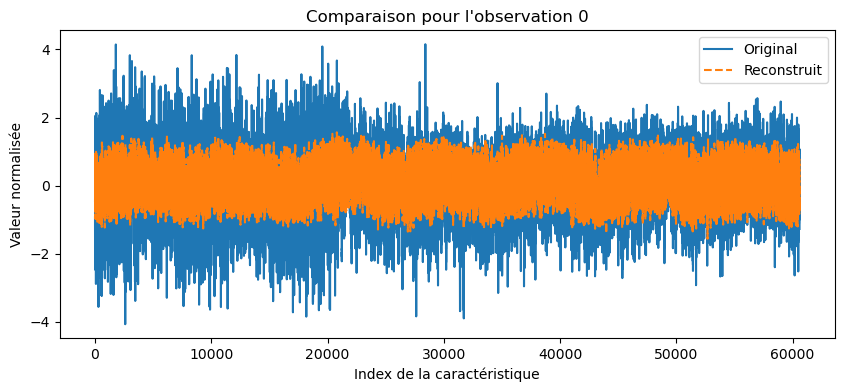

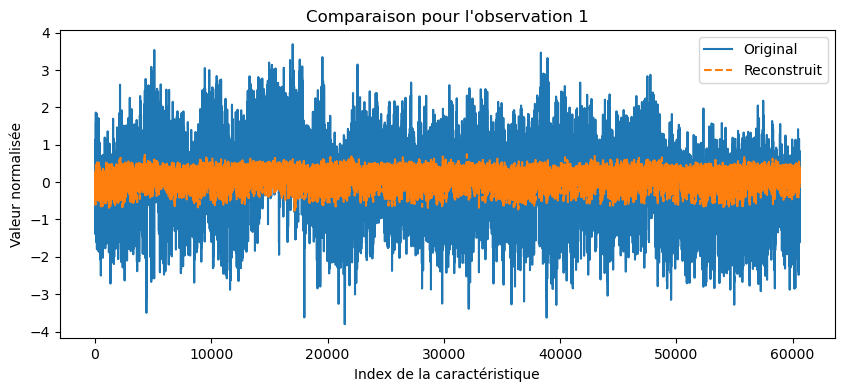

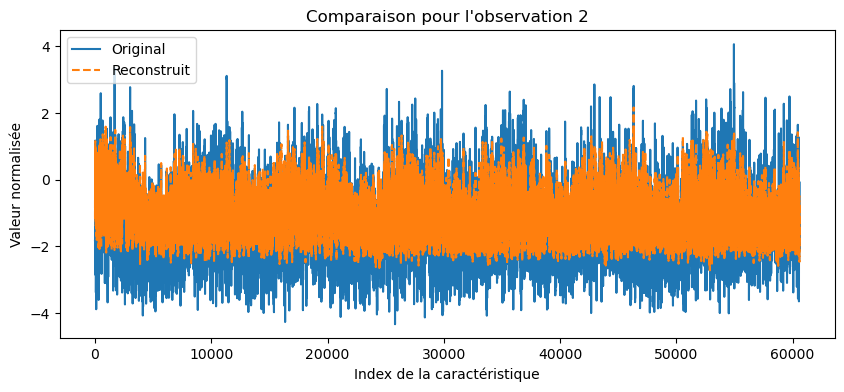

In [6]:
import matplotlib.pyplot as plt

# Reconstruction sur l'ensemble des données
with torch.no_grad():
    reconstructed_all = model(data_tensor.to(device))

# Calcul du MSE global sur l'ensemble des données
mse_global = criterion(reconstructed_all, data_tensor.to(device)).item()
print(f"MSE global sur l'ensemble des données: {mse_global:.4f}")

# On choisit par exemple 3 observations à comparer
n_examples = 3
data_tensor_cpu = data_tensor.cpu().numpy()
reconstructed_cpu = reconstructed_all.cpu().numpy()

for i in range(n_examples):
    plt.figure(figsize=(10, 4))
    plt.plot(data_tensor_cpu[i, :], label='Original')
    plt.plot(reconstructed_cpu[i, :], label='Reconstruit', linestyle='--')
    plt.title(f"Comparaison pour l'observation {i}")
    plt.xlabel("Index de la caractéristique")
    plt.ylabel("Valeur normalisée")
    plt.legend()
    plt.show()


## Nombre de clusters optimal pour les Wi

In [7]:
with torch.no_grad():
    latent_repr = model.encoder(data_tensor.to(device))

latent_array = latent_repr.cpu().numpy()
print("Shape de la représentation latente :", latent_array.shape)


Shape de la représentation latente : (25, 50)


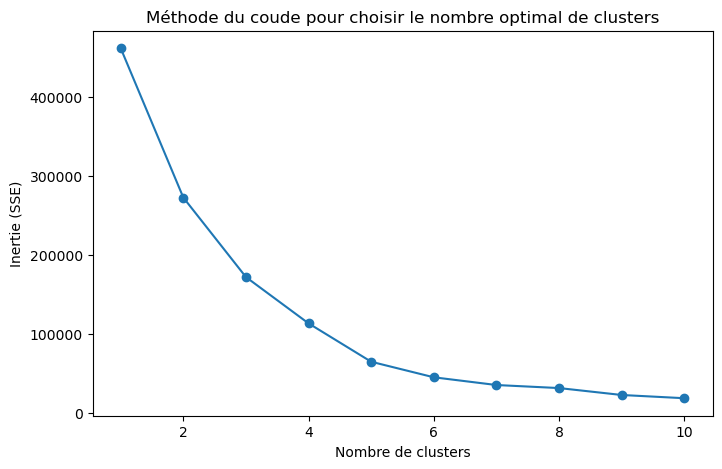

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []  # liste pour stocker l'inertie (SSE) pour chaque nombre de clusters
k_range = range(1, 11)  # tester de 1 à 10 clusters

# Appliquer KMeans sur les données issues de l'espace latent
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(latent_array)
    sse.append(kmeans.inertia_)  # inertia_ correspond à la somme des distances au carré dans chaque cluster

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie (SSE)")
plt.title("Méthode du coude pour choisir le nombre optimal de clusters")
plt.show()


In [9]:
# Choix du nombre de clusters, par exemple 3
optimal_clusters = 5
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(latent_array)

# Affichage du résultat
print("Labels des clusters pour chaque observation :", cluster_labels)


Labels des clusters pour chaque observation : [1 1 2 1 0 4 0 0 2 0 1 1 1 3 1 3 1 3 1 0 4 0 0 1 1]


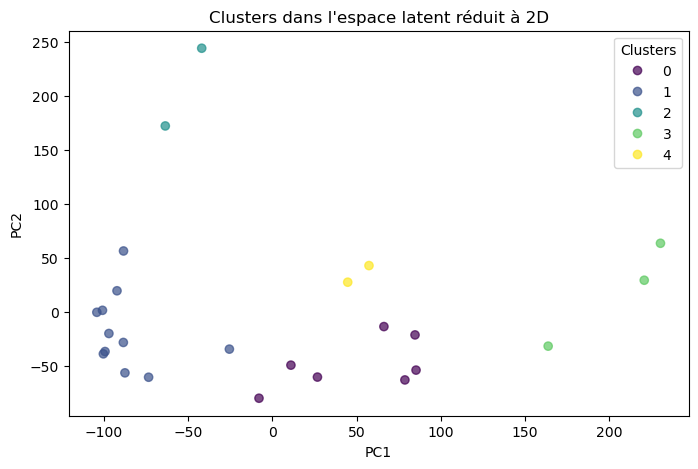

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_array)

plt.figure(figsize=(8,5))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Clusters dans l'espace latent réduit à 2D")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [11]:
# Choix du nombre de clusters, par exemple 5
optimal_clusters = 5
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(latent_array)

print("Labels des clusters pour chaque observation :", cluster_labels)

representative_indices = []  # Indices dans latent_array qui représentent chaque cluster

for k in range(optimal_clusters):
    # Récupérer les indices des observations appartenant au cluster k
    cluster_indices = np.where(cluster_labels == k)[0]
    # Extraire les données de ce cluster
    cluster_data = latent_array[cluster_indices]
    # Accéder au centroïde du cluster avec kmeans_final.cluster_centers_
    centroid = kmeans_final.cluster_centers_[k]
    # Calculer la distance euclidienne de chaque point au centroïde
    distances = np.linalg.norm(cluster_data - centroid, axis=1)
    # Trouver l'indice (au sein du cluster) du point le plus proche du centroïde
    min_idx_in_cluster = np.argmin(distances)
    # Convertir en indice par rapport à l'ensemble des observations
    representative_idx = cluster_indices[min_idx_in_cluster]
    representative_indices.append(representative_idx)

print("Indices des wi représentatifs par cluster :", representative_indices)

# Facultatif : Afficher les wi sélectionnés à partir de vos données originales.
selected_wi = df_w.iloc[representative_indices]
print("wi sélectionnés pour chaque cluster :")
print(selected_wi)


Labels des clusters pour chaque observation : [1 1 2 1 0 4 0 0 2 0 1 1 1 3 1 3 1 3 1 0 4 0 0 1 1]
Indices des wi représentatifs par cluster : [np.int64(9), np.int64(14), np.int64(2), np.int64(17), np.int64(5)]
wi sélectionnés pour chaque cluster :
     0      1      2      3      4      5      6      7      8      9      \
wi                                                                          
w10     42     41     40     39     38     37     37     36     35     45   
w15     47     47     47     47     46     47     48     45     50     55   
w3      40     38     37     37     37     36     37     37     38     43   
w18     50     49     50     49     49     45     44     51     53     58   
w6      46     45     45     48     49     48     44     48     51     55   

     ...  60590  60591  60592  60593  60594  60595  60596  60597  60598  60599  
wi   ...                                                                        
w10  ...     54     53     51     49     46     43